# 1. **Bar Graph Analysis (Each State Frequency)**

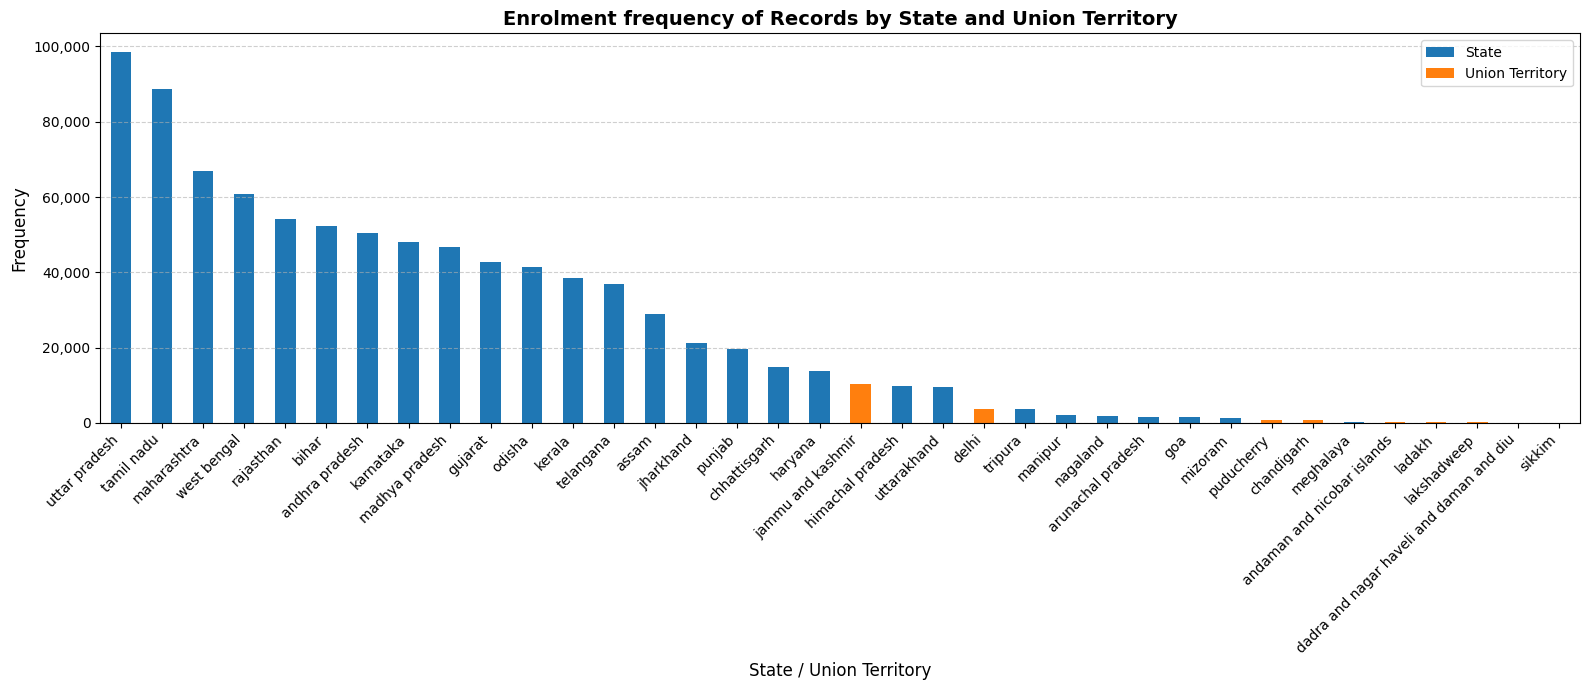

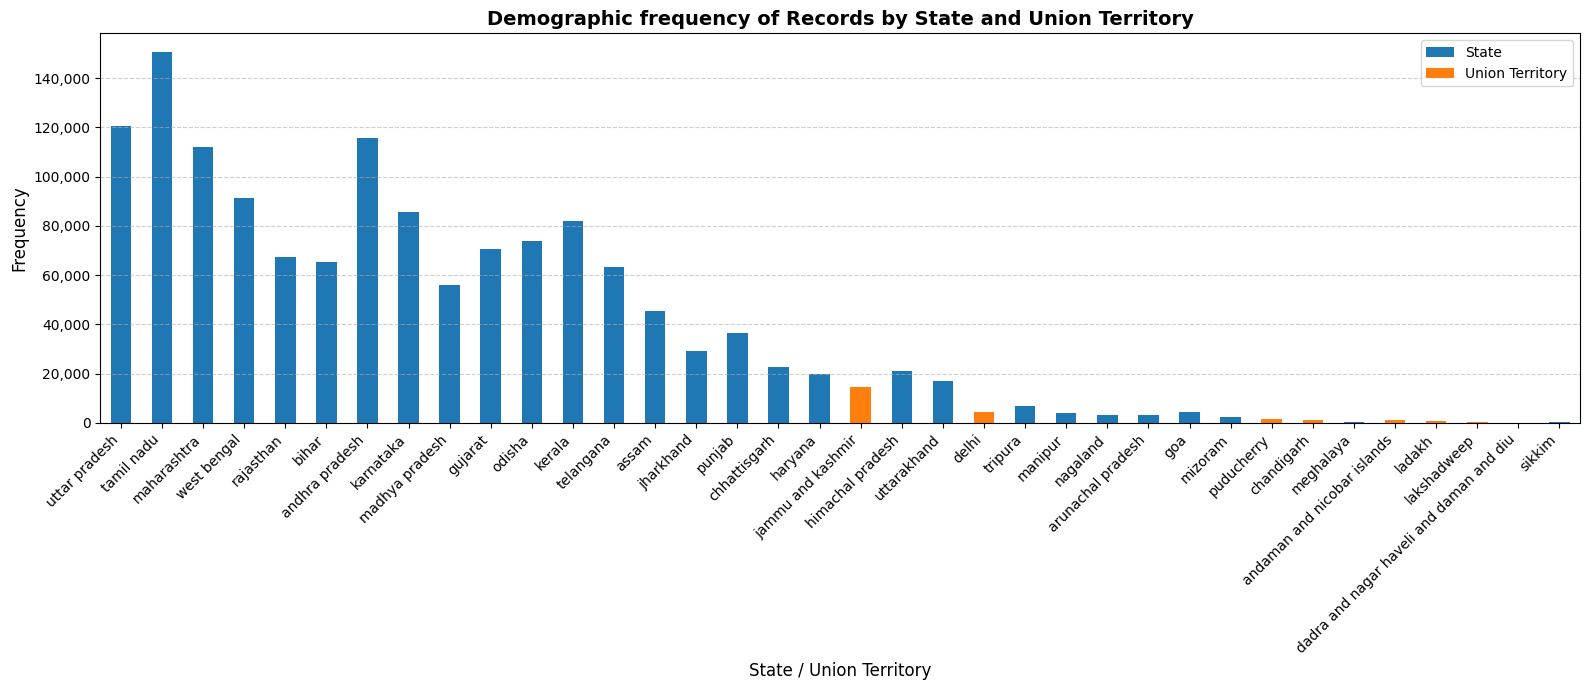

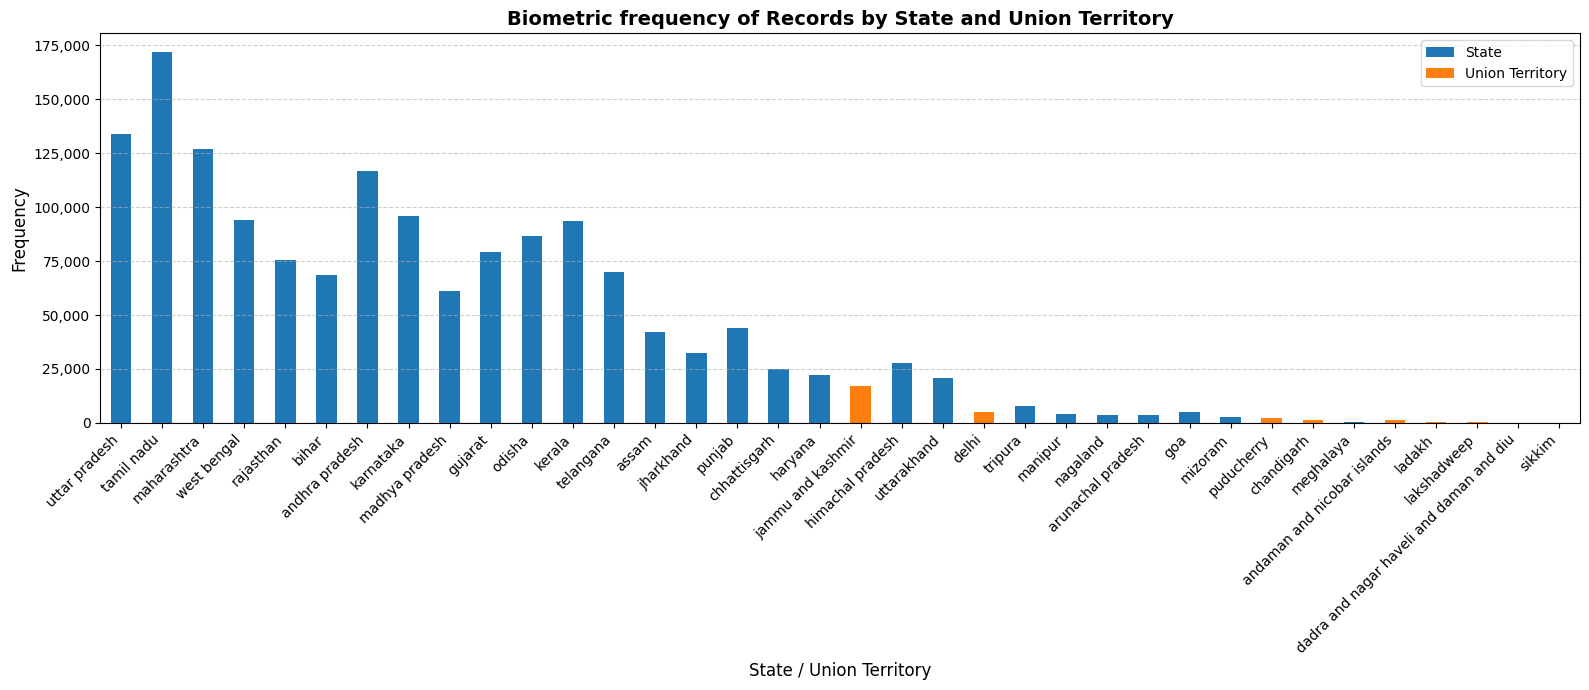

# 1.1 Top State Comparison: Key Findings


1.  Uttar Pradesh (UP), with a population of ~241 Million, generated 98,558 new enrollments. In contrast, Tamil Nadu (TN), with a much smaller population of ~75 Million, generated 88,758 new enrollments—nearly matching UP's absolute numbers.
2.   When normalized against the population base, the disparity becomes mathematically distinct. Uttar Pradesh's enrollment volume represents a capture rate of approximately $\frac{98,558}{200,000,000}$ (approx. 0.041%), whereas Tamil Nadu's volume represents a much denser rate of $\frac{88,758}{75,000,000}$ (approx. 0.115%). This reveals that Tamil Nadu is generating enrollments at a relative intensity nearly 3 times greater than Uttar Pradesh, proving that despite UP's higher absolute numbers, its operational efficiency per unit of population is significantly lower.
3. It indicates superior operational efficiency in Tamil Nadu. The state is aggressively capturing its remaining unregistered population, whereas Uttar Pradesh shows signs of service under-penetration, failing to generate volume proportional to its massive demographic scale.
4. This operational advantage is not limited to enrollments alone. Tamil Nadu also records markedly higher biometric and demographic data volumes than Uttar Pradesh, strongly corroborating the state’s superior execution and deeper population coverage.



# 1.2 Sikkim Anomaly
1. Across almost all states & UT's, the ratio of Biometric Updates to Demographic Updates is remarkably consistent, hovering around 1.1 to 1.15. (e.g., Tamil Nadu: 1.14, UP: 1.11, Maharashtra: 1.13).

2. A critical discrepancy exists in the operational data for Sikkim, characterised by a massive imbalance between Demographic and Biometric transaction volumes.


*   Demographic Activity: 185 entries were recorded.
*   Biometric Activity: Only 5 entries were recorded.
*   The Disparity: This results in a 0.027 (Bio: Demo), significantly deviating from the national average where these two activities usually remain comparable (approx. 1:1.5).

3. The presence of a large volume of eligible adults processing text-based/online updates without corresponding biometric scans confirms a systemic hardware or process failure in the region. Biometric capture devices were likely non-functional or offline, forcing a fallback to demographic-only processing.

4. Now, we can think that this can be a noise because of small population of sikkim, but even in other region with very low activity (e.g., Dadra & Nagar Haveli & Daman and Diu with only ~160 records of demographic & Biometric updates), the ratio stays balanced (around 0.8 to 1.1). Sikkim is the only region where the ratio(Bio:Demo) explodes to 0.027( 1:37). This proves that the issue isn't "Small Population Noise" but a specific operational failure in that state. If it were just noise, we would see random swings in Ladakh or Lakshadweep too, but we don't.

So, we can confidently state this as a real problem.





# 2. **Correlation Analysis**

# 2.1 The "Parent-Child" Update Sync

# Do Child Enrollments Drive Adult Aadhaar Updates? A Correlation Analysis



In [ ]:
import pandas as pd
df_enrol = pd.read_csv('/content/enrol_cleaned_final_for_analysis.csv')
df_demo = pd.read_csv('/content/demo_cleaned_final_for_analysis.csv')
df_bio = pd.read_csv('/content/bio_cleaned_final_for_analysis.csv')

In [ ]:
df_enrol.groupby('state')['age_0_5'].mean().corr(
    df_demo.groupby('state')['demo_age_17_'].mean()
)

np.float64(0.8657959259606719)

In [ ]:
df_enrol.groupby('state')['age_0_5'].mean().corr(
    df_bio.groupby('state')['bio_age_17_'].mean()
)

np.float64(0.8477557703692995)

1. We found a remarkably high correlation (~0.85) between Enrol Child (0-5) and Demo & Bio Adult(17+)

2. Finding: When parents visit a center to enroll their newborn (Age 0-5), they likely use that same trip to update their own
demographic & Biometric details. The data suggests a "Family Visit Pattern" where one trip serves multiple purposes: enrolling the
baby and fixing the parents' data.

## The above thing can be completely become true by Calculating the coefficient of Determination ($R^2$ ), which tells how much the Y is being explained by X.

In [ ]:
# Align data at state level
aligned_df = (
    df_demo.groupby('state')['demo_age_17_'].sum().to_frame().join(df_enrol.groupby('state')['age_0_5'].sum(),how='inner'))

# R-squared (square of Pearson correlation)
r2 = aligned_df['demo_age_17_'].corr(aligned_df['age_0_5']) ** 2
r2

np.float64(0.8744195809149057)

### We can see the value, it's completely explaining that Parent-child Analogy

# 2.2 Stability Analysis: The Coefficient of Variation (CV)

# To understand the operational nature of Aadhaar services—specifically whether different services function as routine daily operations or as episodic, event-driven activities—we analyzed their Coefficient of Variation (CV).


*   Metric Used: $CV = \frac{\sigma}{\mu} \ $ (Standard Deviation divided by Mean).Significance: A low CV indicates consistent, stable daily operations. A high CV (>>1) indicates high variation, means there are some quite times, that the event didn't even happen.



In [ ]:
df_bio['bio_age_17_'].std() / df_bio['bio_age_17_'].mean()


np.float64(4.470976469802917)

In [ ]:
df_demo['demo_age_17_'].std() / df_demo['demo_age_17_'].mean()


np.float64(5.584409017905097)

In [ ]:
df_enrol['age_18_greater'].std() / df_enrol['age_18_greater'].mean()


np.float64(14.550357607037842)


1.   Observation:
The CV for new adult enrollments (18+) is extremely high (>14).
2.  This pattern strongly indicates that adult Aadhaar enrollment has reached a mature and highly efficient stage. The majority of the adult population is already enrolled, reflecting the successful and widespread implementation of Aadhaar across the country. Consequently, new adult enrollments are no longer part of routine daily operations.

3. The very high coefficient of variation further indicates the presence of extended low-activity or zero-activity periods, during which no adult enrollment occurs at many centers. Enrollment activity surfaces only during short, high-intensity windows, typically driven by targeted government initiatives such as special camps, outreach programs for migrant populations, or backlog clearance drives.

4. Importantly, this behavior is a positive operational signal. It demonstrates that Aadhaar resources are not continuously deployed when demand is absent, but are instead activated precisely when required, ensuring efficient use of infrastructure and manpower rather than maintaining idle daily capacity.


### Let's Verify the same with number of zeroes in the adult enrolments

In [ ]:
df_enrol[df_enrol['age_18_greater']==0]['age_18_greater'].count()

np.int64(838771)

# 2.3 Quartile Analysis

## To understand how busy different Aadhaar centers really are, we looked beyond mean and standard deviation, Averages don’t show the full picture — quartiles help us see how Aadhaar centers actually work

# Analyzing first by IQR (Inter Quartile Range)

## Here, to assess the operational workload of Aadhaar centers, we focus only on biometric data. This is because the majority of activities at Aadhaar centers involve updates rather than fresh enrollments, and biometric updates are mandatory in-person processes that can only be completed at physical centers. In contrast, many demographic updates can now be performed through online channels, making them a less reliable indicator of actual center-level activity.

In [ ]:
def iqr_calculator(df, state: str, value_col: str = 'bio_age_17_') -> float:
    """
    Calculates the Interquartile Range (IQR) of center-level workload
    for a given state.
    """
    df_state = df_bio[df_bio['state'] == state]

    center_totals = (df_state.groupby('pincode')[value_col].sum())

    q1 = center_totals.quantile(0.25)
    q3 = center_totals.quantile(0.75)

    print('Q1: ',q1)
    print('Q3: ',q3)
    iqr = q3 - q1
    print('IQR is:' ,iqr)


In [ ]:
iqr_calculator(df_bio,'delhi')

Q1:  1700.75
Q3:  8907.25
IQR is: 7206.5


In [ ]:
iqr_calculator(df_bio, 'assam')

Q1:  139.0
Q3:  763.25
IQR is: 624.25


In [ ]:
iqr_calculator(df_bio, 'chhattisgarh')

Q1:  2111.0
Q3:  8519.25
IQR is: 6408.25


In [ ]:
iqr_calculator(df_bio, 'kerala')

Q1:  291.0
Q3:  889.0
IQR is: 598.0


In [ ]:
iqr_calculator(df_bio, 'maharashtra')

Q1:  751.25
Q3:  4572.75
IQR is: 3821.5


In [ ]:
iqr_calculator(df_bio, 'andhra pradesh')

Q1:  329.5
Q3:  1068.5
IQR is: 739.0


In [ ]:
iqr_calculator(df_bio, 'odisha')

Q1:  615.0
Q3:  1768.25
IQR is: 1153.25


In [ ]:
iqr_calculator(df_bio, 'assam')

Q1:  139.0
Q3:  763.25
IQR is: 624.25


## Key Things:

1.   In these states, the "Middle 50%" of centers have a massive gap in performance. There is no standard operational capacity. A "typical" center could be doing 1,000 updates or 8,000 updates.

2. Chhattisgarh (IQR = 6,408): Usually, high variation is bad. But here, Q1 is High (2,111).
This means all centers are busy, but some are extremely busy. It’s a "Good Problem"—the network is active everywhere, just unevenly loaded.

3. Maharashtra (IQR = 3,821):
Q1 is just 751, but Q3 is 4,572.
Massive disparity between rural (Q1) and urban (Q3) centers. The "middle class" of centers doesn't really exist; you either have small rural spots or busy town hubs. The same is being explained by higher IQR.

4. Kerala (IQR = 598):
Q1 is 291, Q3 is 889.
Highly standardized. Whether you go to a center in Kasaragod or Kollam, the operational load is roughly the same. This indicates a very planned, decentralized distribution of centers.

5. Andhra Pradesh (IQR = 739):
Similar to Kerala. The network is consistent. Resource planning is easy here because every center has a predictable load.

So we can summarize the key findings as follows


*   Most Unequal Experience: Delhi & Maharashtra (Depends heavily on which center you pick).
*  Most Uniform Experience: Kerala & Odisha (Consistent service levels almost everywhere).
*   Most Chaotic / Unpredictable: Assam (High relative variation: IQR/Median).





## In such way we can see various centers functionality in various states.





## 2.4 Are Biometric and Demographic Updates Truly Separate, or Do They Move Together?

## Common perception suggests that if one updates biometrics, they also update demographics. However, our correlation analysis proves this false: while co-located at the same centers, these are distinct user journeys that do not move in lockstep.


--- Statistical Findings ---
Correlation Coefficient (r): 0.7739
Coefficient of Determination (R^2): 0.5989


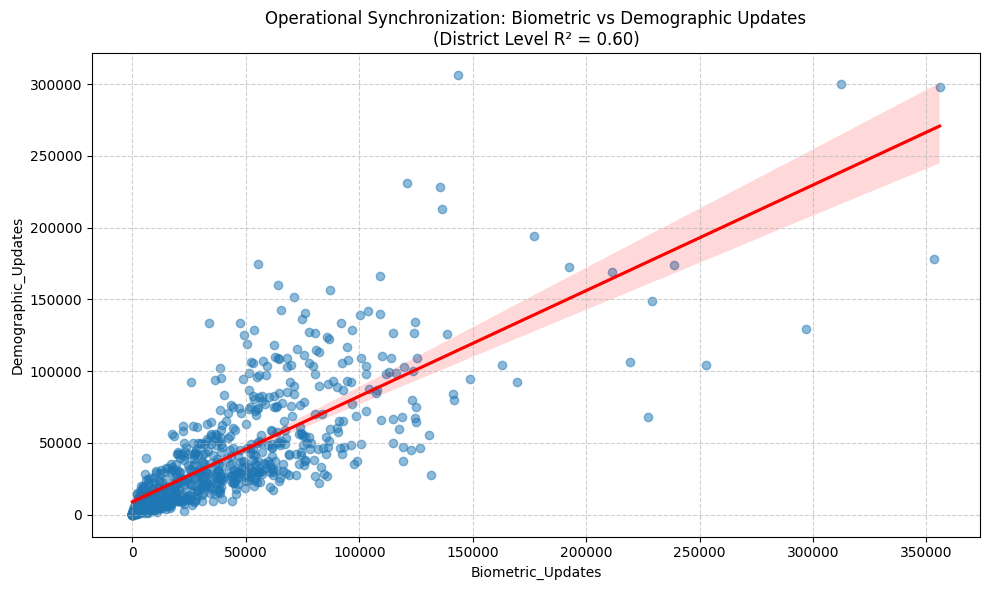

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


# Focusing on ADULTS (17+) as they drive the volume
bio_district = df_bio.groupby(['state', 'district'])['bio_age_17_'].sum().reset_index()
demo_district = df_demo.groupby(['state', 'district'])['demo_age_17_'].sum().reset_index()


# This ensures we only compare districts that exist in both datasets
merged_df = pd.merge(bio_district, demo_district, on=['state', 'district'])

# Rename columns for cleaner graph labels
merged_df.rename(columns={'bio_age_17_': 'Biometric_Updates', 'demo_age_17_': 'Demographic_Updates'}, inplace=True)

# Calculate R-Squared (Pearson Correlation ^ 2)
correlation = merged_df['Biometric_Updates'].corr(merged_df['Demographic_Updates'])
r_squared = correlation ** 2

print(f"--- Statistical Findings ---")
print(f"Correlation Coefficient (r): {correlation:.4f}")
print(f"Coefficient of Determination (R^2): {r_squared:.4f}")

#  Generate the Regression Plot
plt.figure(figsize=(10, 6))

# sns.regplot
sns.regplot(
    data=merged_df,
    x='Biometric_Updates',
    y='Demographic_Updates',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title(f'Operational Synchronization: Biometric vs Demographic Updates\n(District Level R² = {r_squared:.2f})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show
plt.savefig('biometric_demographic_correlation.png')
plt.show()

# The correlation ($R^2 = 0.59$) indicates that Biometric and Demographic services are delivered through a unified infrastructure (co-located at the same centers). However, the lack of a near-perfect correlation ($R^2 < 0.9$) demonstrates that these are independent user journeys. Citizens visit centers for specific, distinct needs—either a mandatory biometric refresh or a voluntary demographic correction—rather than consuming both services as a bundle.

# 2.5 Least Square Method Analysis

## The "Zero-Intercept" Mystery: Behavioral Gap or Technical Barrier?

## Let's first make a Linear Regression line

In [ ]:
import numpy as np

aligned_df = (df_bio.groupby('state')['bio_age_17_'].mean().to_frame().join(df_demo.groupby('state')['demo_age_17_'].mean(),how='inner'))

x = aligned_df['bio_age_17_'].values     # independent variable
y = aligned_df['demo_age_17_'].values    # dependent variable

slope, intercept = np.polyfit(x, y, 1)

print(f"demo_age_17_ = {intercept:.3f} + {slope:.3f} × bio_age_17_")


demo_age_17_ = 0.027 + 1.045 × bio_age_17_


1.  ##  The regression analysis yields a near-zero intercept ($0.027$) for Adult Demographic updates.
2. ##   Meaning: When physical centers are closed (Biometric = 0), Demographic updates stop completely (it's also nearly zero). The "Online/Self-Service" channel is effectively inactive.

## The "Unknown Variable": Why is the Online Channel Silent? While this confirms "Total Center Dependency," the root cause represents a critical "Known Unknown" that requires further data to investigate. The inactivity is driven by one of two distinct factors:

### Hypothesis A: The Behavioral Barrier (Digital Literacy)
1. The Scenario: Citizens have their mobile numbers linked but lack the awareness or confidence to use the Self-Service Update Portal (SSUP).

2. The Fix: Information Education & Communication (IEC) campaigns (e.g., YouTube tutorials, ads).

### Hypothesis B: The Structural Barrier (Mobile Linkage)
1. The Scenario: Citizens want to use the online portal, but cannot because their mobile number is not linked to Aadhaar (a mandatory prerequisite for OTP authentication).
2. The Constraint: Without a linked mobile number, the online door is locked. These citizens are forced to visit a center just to link their mobile, making the "Center Dependency" structural, not behavioral.

### *Conclusion & Strategic Idea:* We cannot definitively solve this "Zero-Intercept" mystery without analyzing "Mobile Saturation Data" (percentage of Aadhaar holders with linked mobiles).

1. If Mobile Linkage is High (>80%): The problem is Behavioral. The strategy must be Digital Awareness.

2. If Mobile Linkage is Low (<40%): The problem is Structural. The strategy must be Mobile Seeding Camps to unlock the online potential for the population.


## Why we have analyzed only adult age for least square method?

### Answer:
1. The regression equation for the 5-17 age group differs fundamentally from that of adults:
$$Demographic\_Updates_{(5-17)} = -0.376 + 0.157 \times (Biometric\_Updates_{(5-17)})$$

2. The slope is extremely low (0.157), compared to 1.045 for adults.For every 100 children visiting a center, only ~15 perform a demographic update. This confirms that child visits are driven almost exclusively by Mandatory Biometric Updates (at ages 5 and 15). Demographic changes are merely incidental side-effects of these mandatory visits, not the primary driver.

3. The intercept is negative (effectively zero in real terms).
There is zero independent demand for child demographic updates. Unlike adults, children do not have a "Digital Gap" because they do not have a choice. Their primary requirement—the Mandatory Biometric Update—requires physical hardware (iris/fingerprint scanners) and cannot be performed online.

In [ ]:
import numpy as np

aligned_df = (
    df_bio.groupby('state')['bio_age_5_17'].mean().to_frame().join(df_demo.groupby('state')['demo_age_5_17'].mean(),how='inner'))

x = aligned_df['bio_age_5_17'].values     # independent variable
y = aligned_df['demo_age_5_17'].values    # dependent variable

slope, intercept = np.polyfit(x, y, 1)

print(f"demo_age_5_17 = {intercept:.3f} + {slope:.3f} × bio_age_5_17")


demo_age_5_17 = -0.376 + 0.157 × bio_age_5_17


# 3. **Probability**, The Efficiency Matrix: A Bayesian Probability Analysis


## In the previous sections, we analyzed states based on Total Volume. However, volume can be misleading: a large state (like Uttar Pradesh) may generate high volume simply because it has thousands of centers, even if many are inefficient.

## To uncover the true "Operational Health" of each state, we applied Bayesian Probability Theory. This allows us to separate Scale (Size) from Efficiency (Quality).

## The Probability Framework
## We defined a "Successful Center" ($H$) as any center performing in the Top 25% of national capacity. We then calculated two critical probabilities for each state:
1. Operational Efficiency ($P(H \mid S)$):
  *   Question: "If a citizen walks into a random center in this State ($S$), what is the probability it is a High-Performing center ($H$)?"
  *   Significance: This measures the Quality of Management. A high score means the state runs a "tight ship"—almost every center is productive.

2. Market Dominance ($P(S \mid H)$)::
  *   Question: "If we look at the pool of High-Performing centers in India ($H$), what is the probability the center belongs to this State ($S$)?"
  *   Significance: This measures Sheer Scale. A high score means the state contributes a lot to the national total, often just because it is geographically large.






In [ ]:
import pandas as pd

# Event S: Center belongs to State | Event H: Center is High Performing (>75th Percentile)
center_data = df_bio.groupby(['state', 'pincode'])['bio_age_17_'].sum().reset_index()
threshold = center_data['bio_age_17_'].quantile(0.75)
center_data['is_high_perf'] = center_data['bio_age_17_'] >= threshold  #The top-25 filtering out.

# 2. Probability Calculation
stats = center_data.groupby('state').agg(Total_Centers=('is_high_perf', 'count'),High_Perf_Centers=('is_high_perf', 'sum')).reset_index()

# Filter for robust states (>50 centers)
stats = stats[stats['Total_Centers'] > 50].copy()

# Calculate Conditional Probabilities
# P(H|S): Efficiency = High_Perf_in_State / Total_in_State
stats['Efficiency_P(H|S)'] = stats['High_Perf_Centers'] / stats['Total_Centers']

# P(S|H): Dominance = High_Perf_in_State / Total_High_Perf_Nation
stats['Dominance_P(S|H)'] = stats['High_Perf_Centers'] / stats['High_Perf_Centers'].sum()

# 3. Output the Matrix
print(stats.sort_values('Efficiency_P(H|S)', ascending=False))

                state  Total_Centers  High_Perf_Centers  Efficiency_P(H|S)  \
6        chhattisgarh            248                187           0.754032   
8               delhi             58                 41           0.706897   
19     madhya pradesh            755                453           0.600000   
4               bihar            822                462           0.562044   
14          jharkhand            351                188           0.535613   
20        maharashtra           1494                769           0.514726   
11            haryana            270                136           0.503704   
27             punjab            511                174           0.340509   
13  jammu and kashmir            184                 62           0.336957   
28          rajasthan            961                302           0.314256   
33      uttar pradesh           1634                504           0.308446   
32            tripura             86                 24         

## Observation:
1. Uttar Pradesh:
   *  Uttar Pradesh has the highest Dominance ($P(S|H)$), meaning it contributes the most high-performing centers to the national pool.
   *   Its Efficiency ($P(H|S)$) is mediocre (~30%).
   *   UP dominates purely because of sheer size. It has thousands of centers, so statistically, some are bound to be good. However, for every 1 "Good" center, it carries the weight of 1.5 "Bad" centers. It is a resource-heavy, inefficient model.

2. Chhattisgarh & Delhi:
    *  These states have extremely high Efficiency ($P(H|S) > 0.75$).
    *  Their Dominance is low (<10%).

3. Assam & Uttarakhand:
    *  Both Efficiency and Dominance are near zero.
    *  This confirms a systemic infrastructure failure. The low efficiency (<10%) means that 9 out of 10 centers listed on paper are essentially non-functional. The state relies entirely on a few massive "Super-Hubs" (outliers) while the rest of the network is a "Ghost."

## Scale Paradox (Concluding):
  Comparing UP vs. Chhattisgarh proves that Bigger $\neq$ Better.
  If the goal is to expand the Aadhaar network efficiently, copying UP's model is a mistake (it's bloated). The data suggests replicating Chhattisgarh's "Quality-First" model is the superior strategy for resource management.

# This analysis moves beyond "Who has the most updates?" to the much more valuable question: "Who manages their network best?"

# 4. **Estimation**

## Now in this analysis, we are focusing on efficiency, not just volume. In a state, which center is doing better compared to others, this can not be just edimated by seeing the mean enrolment or demographic & Biometric updates they are doing, for this we applied 95% Confidence Interval Estimation

## Here we are using Volatility Index
$$\text{Volatility} = \frac{\text{Margin of Error (from 95% CI)}}{\text{Average Performance}}$$

CI = Confidence Interval

1. ## Low Volatility (e.g., 0.3): "The Confidence Interval is narrow." (We are sure about this district).

2. ## High Volatility (e.g., 1.0): "The Confidence Interval is massive." (We have no idea what's happening; it's pure chaos).

### Using the above methodology, districts within the state were evaluated not only on the basis of enrolment volume but on the reliability and stability of their performance. The analysis reveals that districts with similar or even higher average enrolments can exhibit fundamentally different governance characteristics once statistical uncertainty is accounted for.

### A high average enrolment alone does not necessarily indicate strong administrative efficiency. In systems where enrolment activity is unevenly distributed across centers or fluctuates significantly over time, the reported average can be misleading. The introduction of a 95% Confidence Interval allows us to distinguish between districts that are consistently productive and those whose apparent performance is driven by irregular spikes or a small number of high-performing centers.

### Below is the code to calculate confidence interval and volatility

Running Audit for: Uttar Pradesh (Total Records: 98558)

GOVERNANCE AUDIT REPORT: UTTAR PRADESH

[+] STAR PERFORMERS (Top 5 Districts)
    Insight: High Volume & Very Reliable Control.
            Mean_Enrolment  Volatility_Index
district                                    
sitapur         640.120000          0.434453
bahraich        579.640000          0.465847
bijnor          497.840000          0.318076
kheri           396.928571          0.417320
mahrajganj      380.562500          0.474951

[-] CRITICAL FAILURES (Top 5 Districts to Audit)
    Insight: Low Volume & Total Lack of Control.
             Mean_Enrolment  Volatility_Index
district                                     
shrawasti        155.941176          1.063834
firozabad        180.254545          0.899606
bulandshahr      105.553191          0.874069
hathras          188.800000          0.823236
sambhal          167.125000          0.754511

[!] VOLATILE SUCCESS (High Volume but Unstable)
    Insight: Relies on a few '

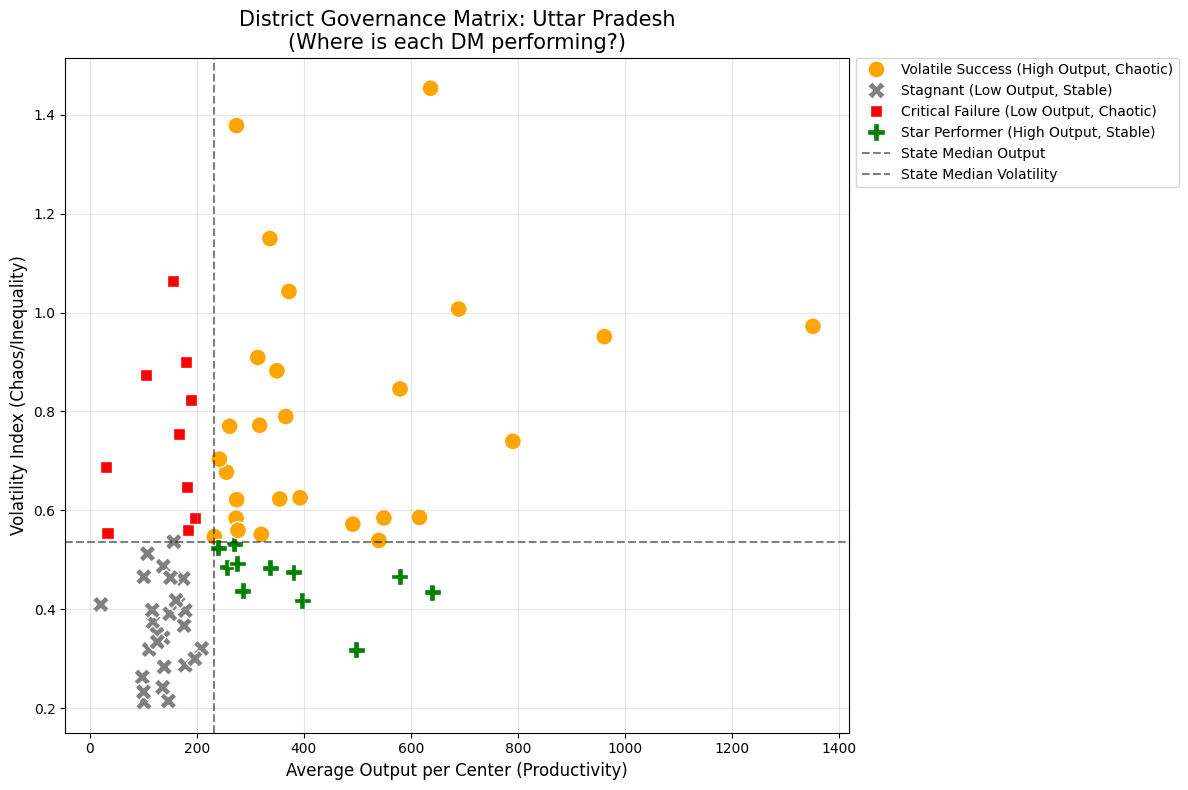

In [ ]:
#we wrote complete code again for better understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load Data
file_path = 'enrol_cleaned_final_for_analysis.csv'

if not os.path.exists(file_path):
    print(f"ERROR: The file '{file_path}' was not found. Please check the name/path.")
else:
    enrol_df = pd.read_csv(file_path)

    # 2. Configuration: Select State
    # Change this to 'Bihar', 'Maharashtra', etc. if you want to analyze another state
    target_state = 'Uttar Pradesh'

    # Filter Data for the Target State (Case-insensitive)
    state_data = enrol_df[enrol_df['state'].str.lower() == target_state.lower()].copy()

    if state_data.empty:
        print(f"No data found for state: {target_state}. Check spelling.")
    else:
        print(f"Running Audit for: {target_state} (Total Records: {len(state_data)})")

        # 3. Define the Sample Unit (Pincode = Center)
        # We sum up the daily enrolments per center (pincode) inside each district
        center_stats = state_data.groupby(['district', 'pincode'])['age_0_5'].sum().reset_index()

        # 4. The Estimation Function (95% CI)
        def audit_district_governance(data):
            n = len(data) # Number of active centers (pincodes) in the district

            # We need a minimum number of centers to be statistically confident
            # If a district has < 5 centers, the math is unreliable -> Skip it
            if n < 5:
                return None

            mean = data.mean()
            std_dev = data.std()

            # Standard Error and Margin of Error (95% CI, Z=1.96)
            if n > 1:
                sem = std_dev / np.sqrt(n)
                margin_of_error = 1.96 * sem
            else:
                margin_of_error = 0 # Only 1 center, no variance

            # Volatility Index (Risk Score)
            # This measures "Chaos". High Value = High Chaos.
            # Formula: Margin of Error divided by Mean (Relative Uncertainty)
            volatility = margin_of_error / mean if mean > 0 else 0

            return pd.Series({
                'Mean_Enrolment': mean,
                'Margin_of_Error': margin_of_error,
                'Volatility_Index': volatility,
                'Active_Centers': n
            })

        # Apply Audit to all districts
        district_audit = center_stats.groupby('district')['age_0_5'].apply(audit_district_governance).unstack()

        # Drop districts that were skipped (None)
        district_audit = district_audit.dropna()

        # 5. Classification Logic (The 4 Quadrants)
        # We calculate the Median of the State to define "Good" vs "Bad"
        mean_threshold = district_audit['Mean_Enrolment'].median()
        volatility_threshold = district_audit['Volatility_Index'].median()

        def classify_district(row):
            high_output = row['Mean_Enrolment'] >= mean_threshold
            low_chaos = row['Volatility_Index'] <= volatility_threshold

            if high_output and low_chaos:
                return 'Star Performer (High Output, Stable)'
            elif not high_output and not low_chaos:
                return 'Critical Failure (Low Output, Chaotic)'
            elif high_output and not low_chaos:
                return 'Volatile Success (High Output, Chaotic)'
            else:
                return 'Stagnant (Low Output, Stable)'

        district_audit['Status'] = district_audit.apply(classify_district, axis=1)

        # 6. Output the Findings
        print("\n" + "="*50)
        print(f"GOVERNANCE AUDIT REPORT: {target_state.upper()}")
        print("="*50)

        # List 1: The Best (Reward These)
        stars = district_audit[district_audit['Status'] == 'Star Performer (High Output, Stable)']
        top_stars = stars.sort_values('Mean_Enrolment', ascending=False).head(5)
        print(f"\n[+] STAR PERFORMERS (Top 5 Districts)")
        print(f"    Insight: High Volume & Very Reliable Control.")
        print(top_stars[['Mean_Enrolment', 'Volatility_Index']])

        # List 2: The Worst (Fix These)
        failures = district_audit[district_audit['Status'] == 'Critical Failure (Low Output, Chaotic)']
        top_failures = failures.sort_values('Volatility_Index', ascending=False).head(5)
        print(f"\n[-] CRITICAL FAILURES (Top 5 Districts to Audit)")
        print(f"    Insight: Low Volume & Total Lack of Control.")
        print(top_failures[['Mean_Enrolment', 'Volatility_Index']])

        # List 3: The Risky Ones
        risky = district_audit[district_audit['Status'] == 'Volatile Success (High Output, Chaotic)']
        top_risky = risky.sort_values('Mean_Enrolment', ascending=False).head(5)
        print(f"\n[!] VOLATILE SUCCESS (High Volume but Unstable)")
        print(f"    Insight: Relies on a few 'Super Centers'. Risk of collapse.")
        print(top_risky[['Mean_Enrolment', 'Volatility_Index']])

        # 7. Visualization
        plt.figure(figsize=(12, 8))

        # Scatter Plot
        sns.scatterplot(
            data=district_audit,
            x='Mean_Enrolment',
            y='Volatility_Index',
            hue='Status',
            style='Status',
            s=150, # Marker size
            palette={'Star Performer (High Output, Stable)': 'green',
                     'Critical Failure (Low Output, Chaotic)': 'red',
                     'Volatile Success (High Output, Chaotic)': 'orange',
                     'Stagnant (Low Output, Stable)': 'gray'}
        )

        # Draw Quadrant Lines
        plt.axvline(x=mean_threshold, color='black', linestyle='--', alpha=0.5, label='State Median Output')
        plt.axhline(y=volatility_threshold, color='black', linestyle='--', alpha=0.5, label='State Median Volatility')

        # Labels
        plt.title(f'District Governance Matrix: {target_state}\n(Where is each DM performing?)', fontsize=15)
        plt.xlabel('Average Output per Center (Productivity)', fontsize=12)
        plt.ylabel('Volatility Index (Chaos/Inequality)', fontsize=12)

        # Invert Y axis? No, strictly: High Y = High Chaos (Bad). Low Y = Low Chaos (Good).
        # We want to be in Bottom-Right (High X, Low Y).

        plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()

        # Save and Show
        plt.savefig('district_audit_quadrant.png')
        print(f"\n[INFO] Graph saved as 'district_audit_quadrant.png'")
        plt.show()

## Interpretation
1. Case Study A: The "Safe Bet" (Sitapur)
  * Data: Mean = 640, Volatility = 0.43
  * Margin of Error $\approx 640 \times 0.43 = \mathbf{275}$
  95% Confidence Interval: $640 \pm 275$ $\rightarrow$ Range: [365 to 915]

2. Case Study B: The "Illusion" (Rampur)
  * Data: Mean = 1351, Volatility = 0.97
  * Margin of Error $\approx 1351 \times 0.97 = \mathbf{1310}$
  95% Confidence Interval: $1351 \pm 1310$ $\rightarrow$ Range: [41 to 2661]

1. ##  The examples above show why looking only at the average enrolment can be misleading. Two districts can show very different averages, but what really matters is how reliable those averages are.
2. ##  In Sitapur, the confidence interval is narrow. This means the enrolment numbers are stable across centers and over time. Even after accounting for uncertainty, we can say with confidence that the district is consistently performing at a strong level. Because the variation is low, the average value of 640 is trustworthy. This makes Sitapur suitable for accurate planning, budgeting, and target setting. The administration has good control over its centers.
3. ## Rampur shows a high average enrolment, but the confidence interval is extremely wide. This tells us that the enrolment numbers vary a lot from center to center or day to day. Because of this large variation, the average value of 1351 cannot be relied upon. The true performance could be much lower or much higher, and we cannot say with confidence where it actually lies. This makes planning risky, as the system is unstable and difficult to predict.



## In short, low volatility means control and reliability, while high volatility signals risk and uncertainty. This is why the confidence interval and volatility measures are critical for fair comparison and informed decision-making.

## This approach allows us to compare districts within a state based on both performance and consistency, not just volume. It helps identify which districts are stable and reliable, and which ones need closer attention or improvement. As a result, decision-makers can focus efforts on the right centers and make informed comments on their functioning.

## We can do the similar Hypothesis Analysis on demographic & Biometric as well

# 5. **Time Analysis** Using K Means Clustering

## Objective: To identify the specific "Rush Day" for every state.
## Hypothesis: Consumer behavior varies by culture. In some states, people might visit centers on Market Days; in others, they might prefer Weekends.

## By this way, we can also predict public lifestyle in a state

## What if keeping service centers open on Sundays is crucial in some states—but almost pointless in others?
This analysis uncovers a hidden behavioral truth: citizen engagement is not just about location, it is about timing. By studying when people actually use services—on weekdays versus weekends—we reveal state- and district-level patterns that challenge the idea of a one-size-fits-all operational strategy.

## The purpose of this analysis is to understand when districts are operationally busiest, focusing specifically on whether activity is weekday-dominant or weekend-dominant, and how this behavior varies within and across states.

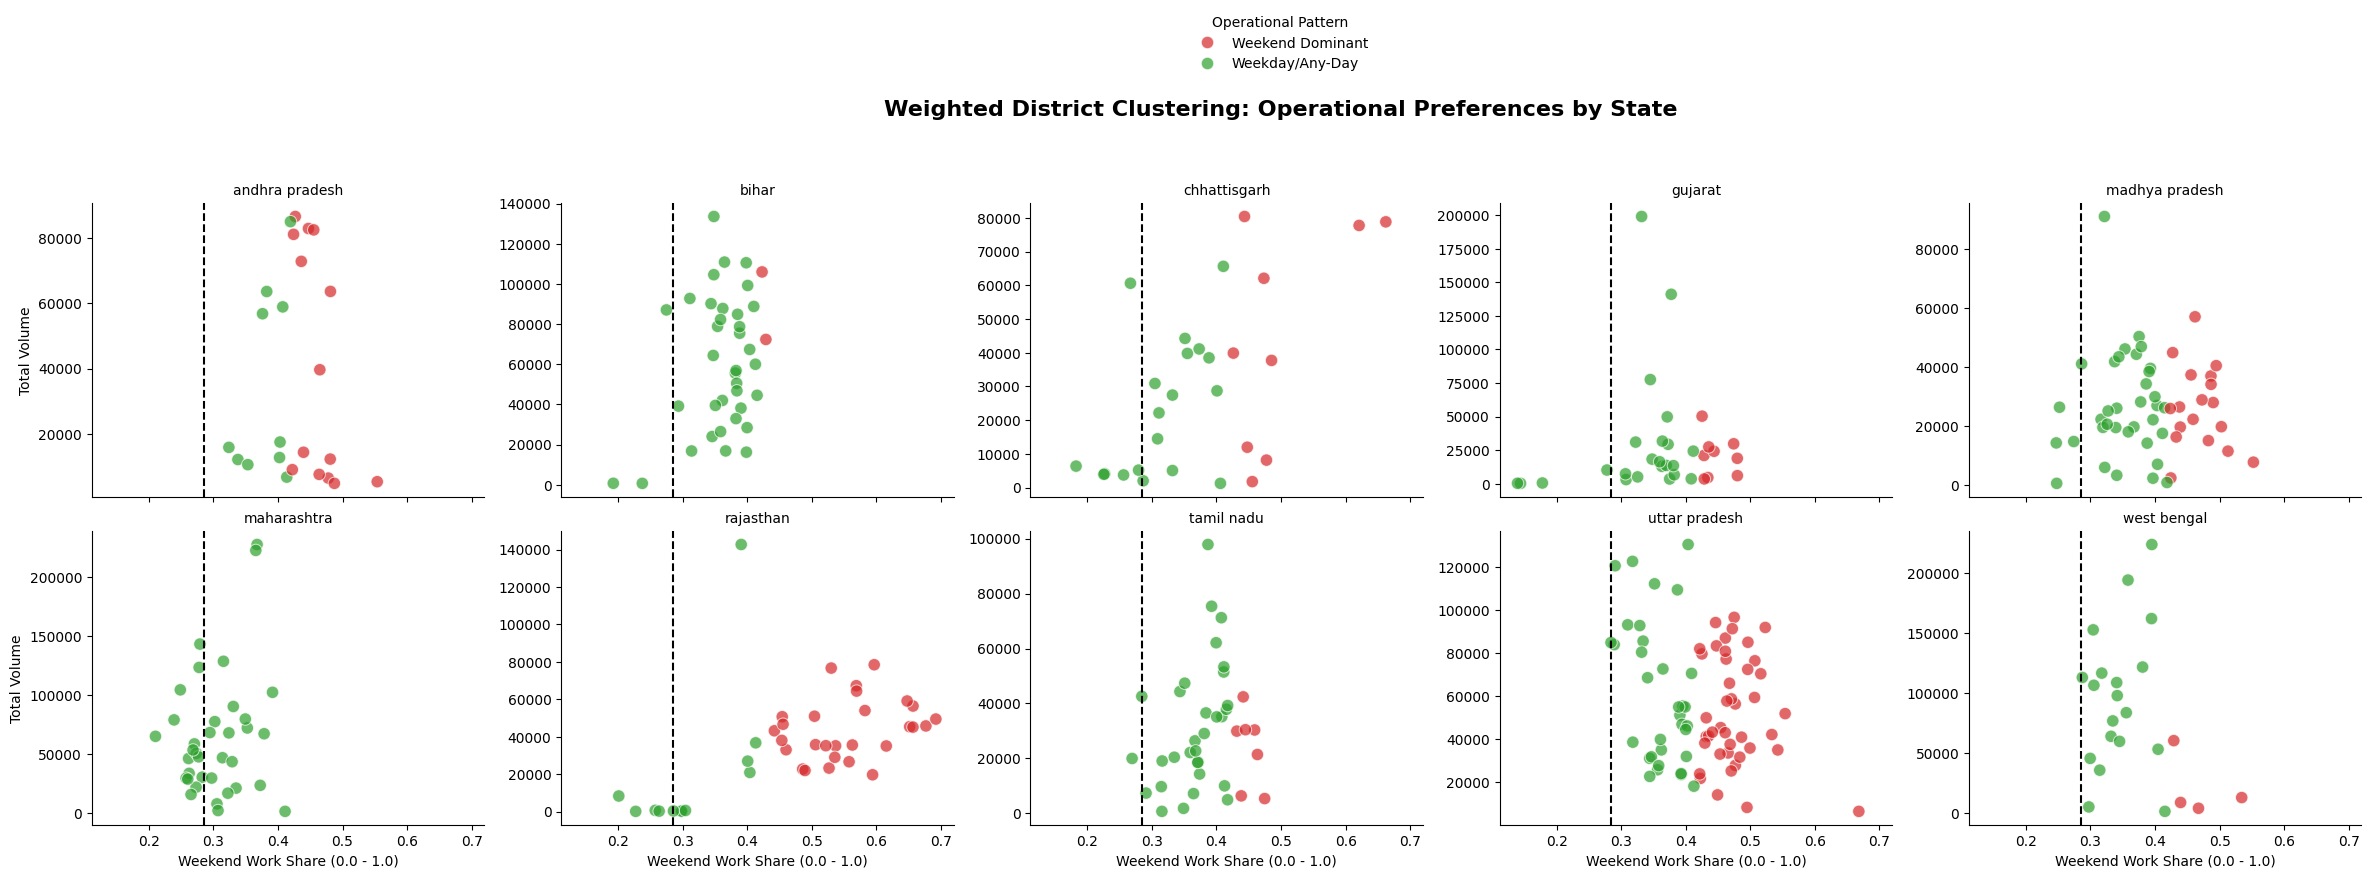


OPERATIONAL CLUSTERING REPORT (Volume-Weighted)
NOTE: The black dashed line represents the 'Neutral' 28.5% share (2/7 days).
      Districts to the RIGHT (Red) are actively busier on weekends.
------------------------------------------------------------
Lifestyle       Weekday/Any-Day  Weekend Dominant  %_Weekend_Dominant
state                                                                
rajasthan                    12                28                70.0
andhra pradesh               10                14                58.3
uttar pradesh                33                42                56.0
madhya pradesh               35                18                34.0
chhattisgarh                 19                 9                32.1
gujarat                      23                 9                28.1
tamil nadu                   31                 7                18.4
west bengal                  19                 4                17.4
bihar                        36              

In [ ]:
 # Code to implement it.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 1. Load Data
try:
    df = pd.read_csv('demo_cleaned_final_for_analysis.csv')

    # 2. Date Processing
    date_col = [col for col in df.columns if 'date' in col.lower()][0]
    df['Date_Obj'] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')
    df = df.dropna(subset=['Date_Obj'])

    # Identify Weekends (Saturday=5, Sunday=6)
    df['Is_Weekend'] = df['Date_Obj'].dt.dayofweek.isin([5, 6]).astype(int)

    # 3. Create District Profiles
    vol_total = df.groupby(['state', 'district'])['demo_age_17_'].sum()
    vol_weekend = df[df['Is_Weekend'] == 1].groupby(['state', 'district'])['demo_age_17_'].sum()

    dist_profile = pd.DataFrame({'Total_Vol': vol_total, 'Weekend_Vol': vol_weekend}).fillna(0)

    # Calculate "Weekend Share"
    dist_profile['Weekend_Share'] = dist_profile['Weekend_Vol'] / dist_profile['Total_Vol']
    dist_profile = dist_profile.reset_index()

    # Filter out tiny districts (Noise reduction: Must have >100 updates to be statistically relevant)
    dist_profile = dist_profile[dist_profile['Total_Vol'] > 100].copy()

    # 4. Filter for Top 10 States (by Volume)
    top_states_list = dist_profile.groupby('state')['Total_Vol'].sum().nlargest(10).index
    final_df = dist_profile[dist_profile['state'].isin(top_states_list)].copy()

    # 5. The Correction: Volume-Weighted K-Means
    # We want the "Centers" of our clusters to be determined by the BIG districts.

    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    X = final_df[['Weekend_Share']]

    # KEY CHANGE: pass 'sample_weight' to prioritize high-volume districts
    kmeans.fit(X, sample_weight=final_df['Total_Vol'])

    final_df['Cluster_Label'] = kmeans.predict(X)

    # 6. Labeling the Clusters (Automated)
    # Check which cluster center is higher
    centers = kmeans.cluster_centers_.flatten()
    if centers[0] > centers[1]:
        mapping = {0: 'Weekend Dominant', 1: 'Weekday/Any-Day'}
    else:
        mapping = {1: 'Weekend Dominant', 0: 'Weekday/Any-Day'}

    final_df['Lifestyle'] = final_df['Cluster_Label'].map(mapping)

    # 7. Visualization: Validated Facet Grid
    g = sns.FacetGrid(
        final_df,
        col="state",
        col_wrap=5,
        height=4,
        aspect=1.2,
        sharex=True,
        sharey=False
    )

    # Scatter Plot
    g.map_dataframe(
        sns.scatterplot,
        x="Weekend_Share",
        y="Total_Vol",
        hue="Lifestyle",
        palette={'Weekend Dominant': '#d62728', 'Weekday/Any-Day': '#2ca02c'}, # Red/Green
        s=80,
        alpha=0.7,
        edgecolor='w'
    )

    # Add the "Mathematical Neutral Line" (28.5%)
    # This proves if our cluster is valid. If Red dots are to the right of this line, it works.
    g.map(plt.axvline, x=0.285, ls="--", c="black", lw=1.5)

    g.add_legend(title="Operational Pattern", bbox_to_anchor=(0.5, 1.05), loc='center')
    g.set_axis_labels("Weekend Work Share (0.0 - 1.0)", "Total Volume")
    g.set_titles("{col_name}")

    plt.subplots_adjust(top=0.85)
    g.fig.suptitle('Weighted District Clustering: Operational Preferences by State', fontsize=16, fontweight='bold')
    plt.show()

    # 8. The "Governance" Output
    print("\n" + "="*60)
    print("OPERATIONAL CLUSTERING REPORT (Volume-Weighted)")
    print("="*60)
    print("NOTE: The black dashed line represents the 'Neutral' 28.5% share (2/7 days).")
    print("      Districts to the RIGHT (Red) are actively busier on weekends.")
    print("-" * 60)

    # Summary Table
    summary = final_df.groupby(['state', 'Lifestyle'])['district'].count().unstack(fill_value=0)
    summary['%_Weekend_Dominant'] = (summary.get('Weekend Dominant', 0) / (summary.sum(axis=1))) * 100

    print(summary.sort_values('%_Weekend_Dominant', ascending=False).round(1))

except Exception as e:
    print(f"Error: {e}")

1.   Rajasthan emerges as the strongest weekend-driven state in the analysis. A large majority of districts fall to the right of the neutral 28.5% line, with many high-volume districts clustered firmly in the weekend-dominant zone. This indicates that weekend operations are not marginal or supplementary, but rather core to service delivery in the state.
*  Operational implication: Any reduction in weekend availability in Rajasthan would directly impact peak demand districts.

2.   Andhra Pradesh also shows a clear tilt toward weekend activity. Several of the state’s highest-volume districts are weekend-dominant, reinforcing that this is not driven by small or exceptional districts but by mainstream usage patterns.
* Operational implication: Weekend staffing and service continuity are critical, especially in high-volume districts.
3. Chhattisgarh follows a similar mixed profile, though with fewer weekend-dominant districts. Some high-volume outliers appear on weekends, but the overall pattern leans toward weekday operations.
4. Gujarat sits close to the neutral boundary but slightly below it. Most districts cluster just left of the neutral line, indicating balanced but weekday-leaning behavior. Weekend-dominant districts are relatively fewer and lower in volume.
5. Simillary we can analyze all other states as well.


## How we ensure that the above patterns reflect real behavior (Not Data Noise)?

1. ## A critical consideration in this analysis was distinguishing genuine operational behavior from patterns driven by small or statistically unstable districts. In many states, there exist districts with very low activity volumes where even a small number of weekend transactions can artificially inflate the “weekend share,” making such districts appear strongly weekend-dominant despite having minimal operational significance. If left unaddressed, these marginal cases can distort cluster formation and lead to misleading conclusions.

2. ## To prevent this, the analysis deliberately incorporates two safeguards. First, low-volume districts were excluded from the clustering exercise by applying a minimum activity threshold. This ensures that districts with only a handful of transactions—where percentage-based metrics are inherently volatile—do not influence the results. Second, the clustering itself was performed using a volume-weighted approach, meaning that districts with higher activity levels exert proportionally greater influence on cluster boundaries than smaller districts.

# Concluding
This combination of volume filtering and weighted clustering confirms that the patterns identified in this analysis are not statistical artifacts created by small or noisy districts, but rather reflect structural, behavior-driven differences in how citizens access services across states and districts.